**Importa as bibliotecas necessárias.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.subplots as sp
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

**Carrega os dados do arquivo CSV.**

In [ ]:
data = pd.read_csv('DailyDelhiClimateTrain.csv')
data.head() # Exibe as primeiras linhas dos dados.

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000,84.500,0.000,1015.667
1,2013-01-02,7.400,92.000,2.980,1017.800
2,2013-01-03,7.167,87.000,4.633,1018.667
3,2013-01-04,8.667,71.333,1.233,1017.167
4,2013-01-05,6.000,86.833,3.700,1016.500


**Iniciando o Pré-Processamento dos dados.**

In [ ]:
data.info() # Exibe informações sobre os dados, como tipo de dados e valores não nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
data.describe() # Exibe estatísticas descritivas dos dados, como média, desvio padrão e quartis.

,meantemp,humidity,wind_speed,meanpressure
count,1462.000,1462.000,1462.000,1462.000
mean,25.496,60.772,6.802,1011.105
std,7.348,16.770,4.562,180.232
min,6.000,13.429,0.000,-3.042
25%,18.857,50.375,3.475,1001.580
50%,27.714,62.625,6.222,1008.563
75%,31.306,72.219,9.238,1014.945
max,38.714,100.000,42.220,7679.333


In [ ]:
data.isnull().sum() # Verifica a quantidade de valores nulos em cada coluna.

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [ ]:
data.duplicated().sum() # Verifica a quantidade de valores duplicados nos dados.

0

**Convertendo a coluna 'date' para o tipo datetime e definindo-a como índice.**

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace= True)
data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667
2013-01-02,7.400,92.000,2.980,1017.800
2013-01-03,7.167,87.000,4.633,1018.667
2013-01-04,8.667,71.333,1.233,1017.167
2013-01-05,6.000,86.833,3.700,1016.500


**Extraindo informações da data (ano, mês, dia, dia da semana) e adicionando como colunas.**

In [ ]:
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek
data['date'] = data.index.date
data.head()

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,date
date,,,,,,,,,
2013-01-01,10.000,84.500,0.000,1015.667,2013,1,1,1,2013-01-01
2013-01-02,7.400,92.000,2.980,1017.800,2013,1,2,2,2013-01-02
2013-01-03,7.167,87.000,4.633,1018.667,2013,1,3,3,2013-01-03
2013-01-04,8.667,71.333,1.233,1017.167,2013,1,4,4,2013-01-04
2013-01-05,6.000,86.833,3.700,1016.500,2013,1,5,5,2013-01-05


**Criando gráficos de linha para temperatura média, umidade, velocidade do vento e pressão média.**

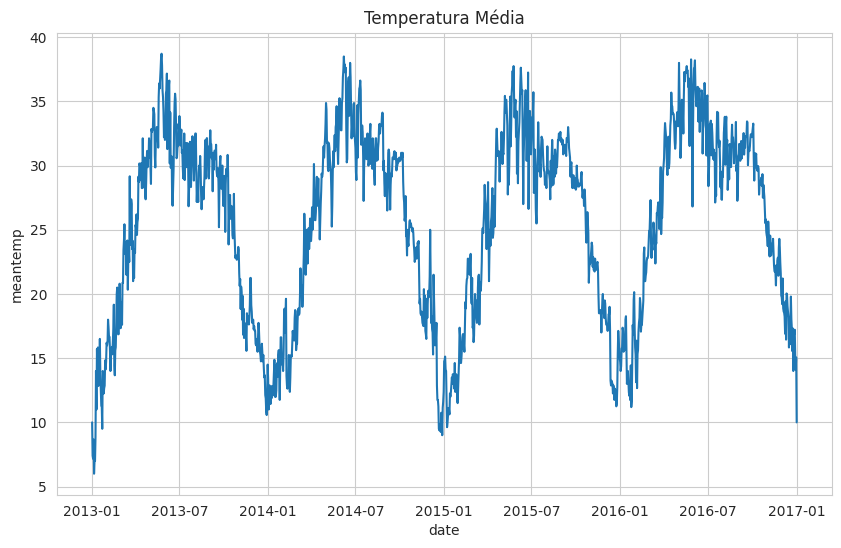

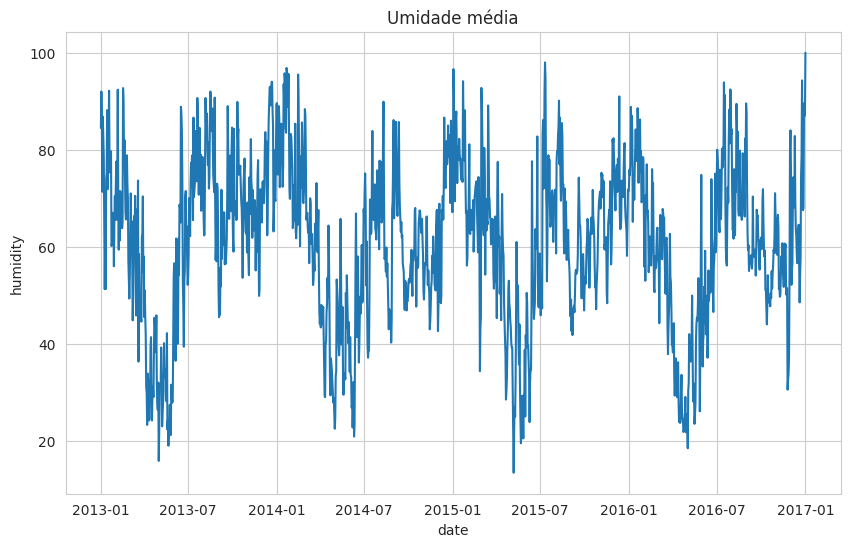

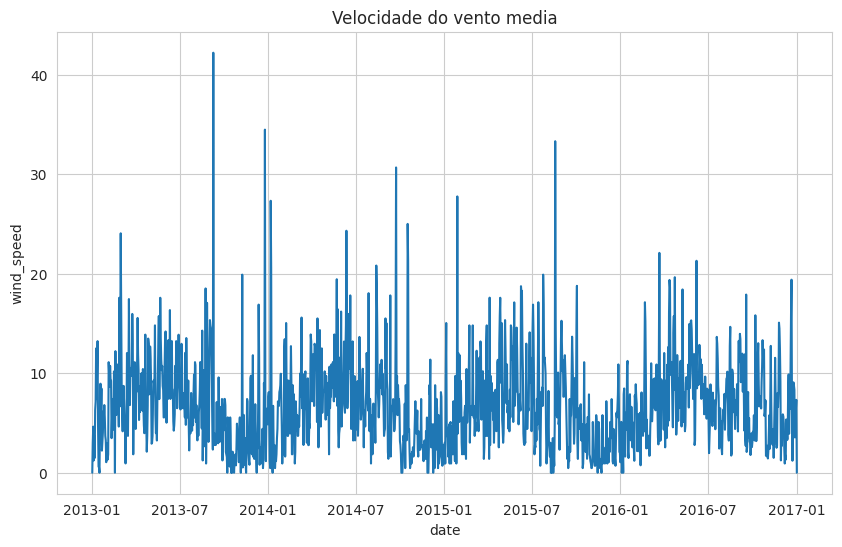

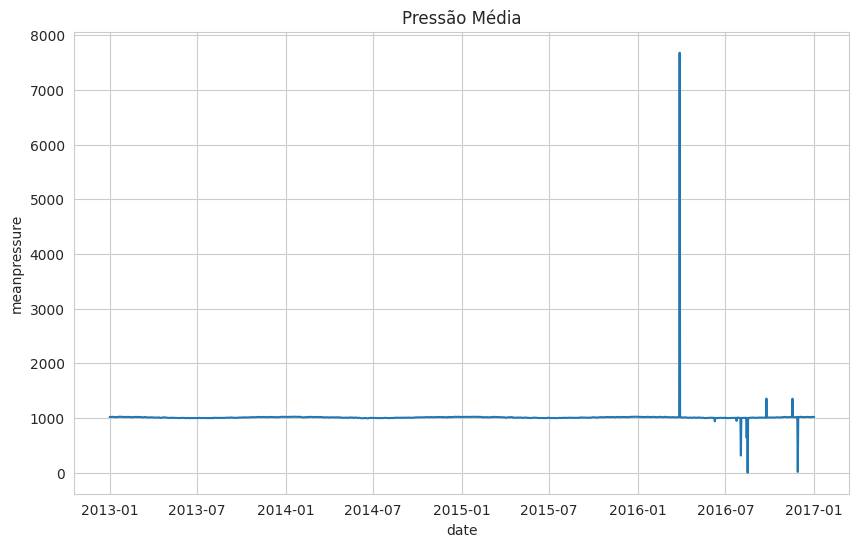

In [ ]:
tempmedia = sns.lineplot(data = data, x=data.index, y=data['meantemp'])
plt.title('Temperatura Média')
plt.show()
humidade = sns.lineplot(data =data, x = data.index, y = data['humidity'])
plt.title('Umidade média')
plt.show()
speed = sns.lineplot(data = data, x = data.index, y = data['wind_speed'])
plt.title('Velocidade do vento media')
plt.show()
pressao = sns.lineplot(data= data, x= data.index, y = data['meanpressure'])
plt.title('Pressão Média')
plt.show()


**Aqui eu realizo a decomposição sazonal da temperatura média e crio gráficos de linha para cada componente da decomposição sazonal.**

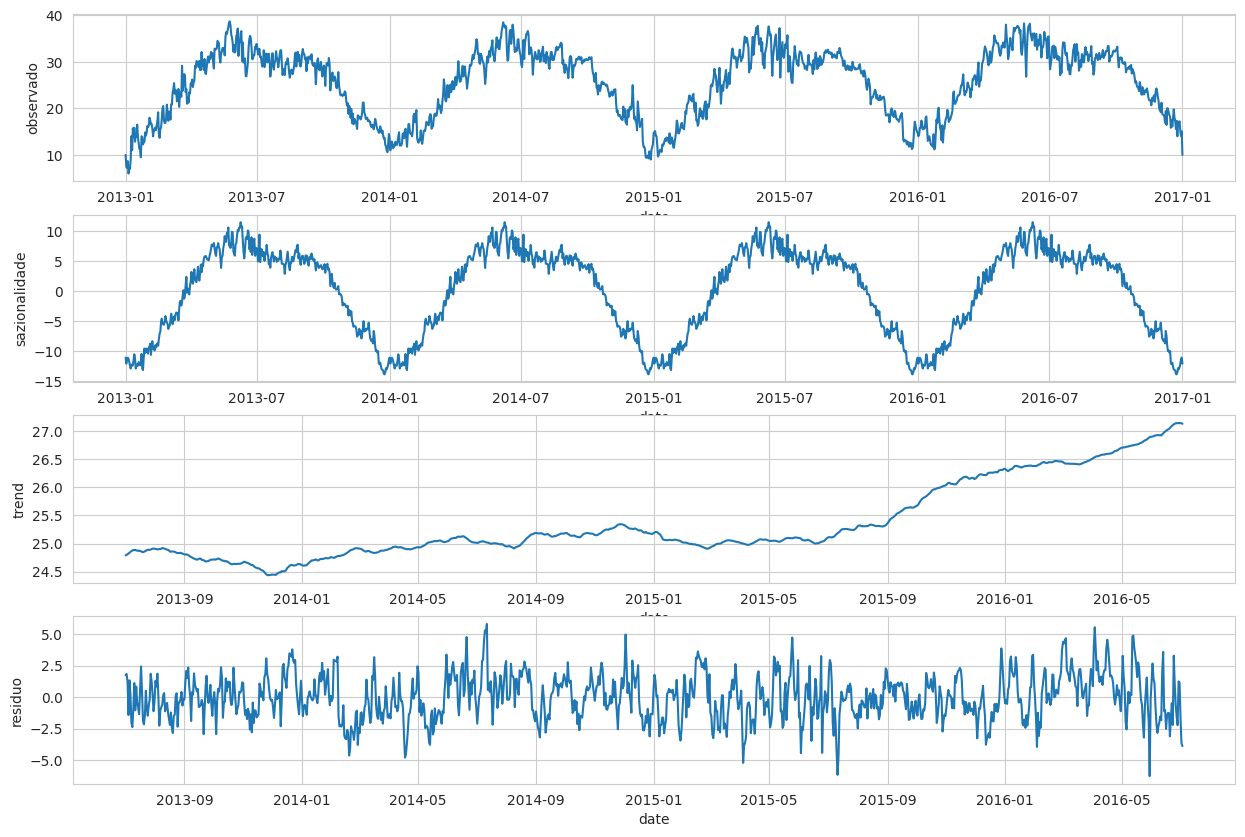

In [ ]:
# Realizando a decomposição sazonal com o modelo aditivo por acreditar que a sazonalidade seja constante.
decomposicao = seasonal_decompose(data['meantemp'], model = 'additive', period = 365)
fig, axes = plt.subplots(4,1, figsize = (15,10))
decomposicaodf = pd.DataFrame({
    'observado' : decomposicao.observed,
    'sazionalidade' : decomposicao.seasonal,
    'trend' : decomposicao.trend,
    'residuo' : decomposicao.resid,
  }, index = data.index)
# Criando gráficos de linha para cada componente da decomposição sazonal.
sns.lineplot(ax = axes[0], x = decomposicaodf.index, y = 'observado', data = decomposicaodf)
sns.lineplot(ax = axes[1], x = decomposicaodf.index, y = 'sazionalidade', data = decomposicaodf)
sns.lineplot(ax = axes[2], x = decomposicaodf.index, y = 'trend', data = decomposicaodf)
sns.lineplot(ax = axes[3], x = decomposicaodf.index, y = 'residuo', data = decomposicaodf)
plt.show()

**Visualização da relação entre as variáveis meteorológicas e o mês**

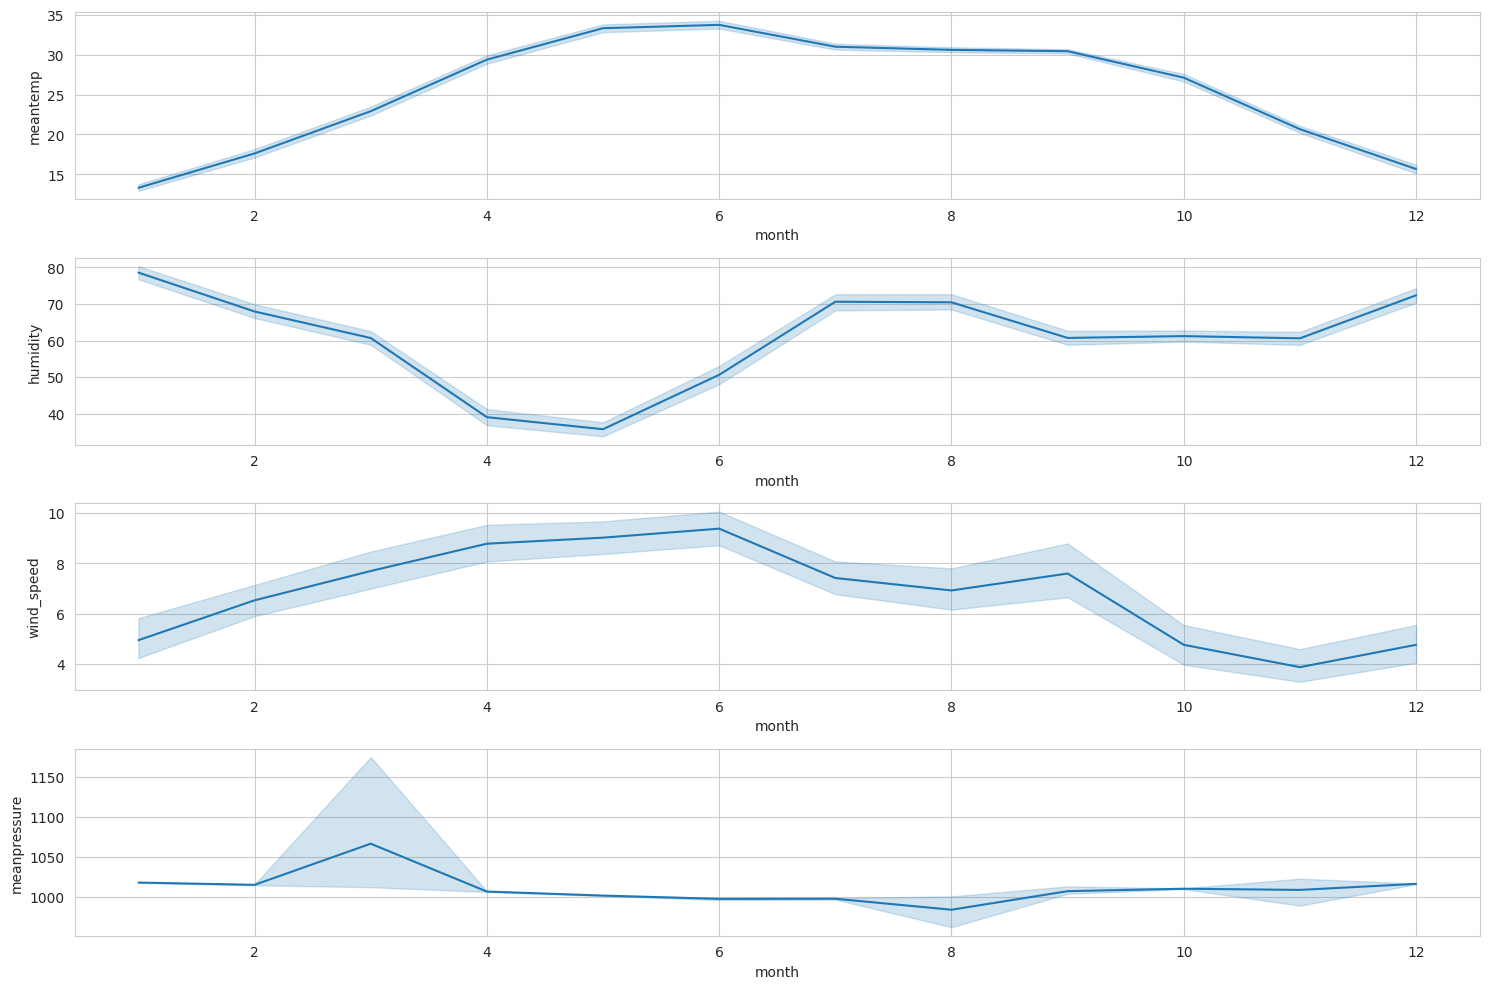

In [ ]:
# Criando uma figura com 4 gráficos dispostos em 4 linhas e 1 coluna.
fig, axes = plt.subplots(4, 1, figsize=(15, 10))

# Criando um gráfico de linha para a temperatura média em relação ao mês no primeiro subplot.
sns.lineplot(ax=axes[0], x='month', y='meantemp', data=data)
# Criando um gráfico de linha para a humidade em relação ao mês no segundo subplot.
sns.lineplot(ax=axes[1], x='month', y='humidity', data=data)
# Criando um gráfico de linha para a velocidade do vento em relação ao mês no terceiro subplot.
sns.lineplot(ax=axes[2], x='month', y='wind_speed', data=data)
# Criando um gráfico de linha para a pressão média em relação ao mês no quarto subplot.
sns.lineplot(ax=axes[3], x='month', y='meanpressure', data=data)

# Ajustando o layout para evitar sobreposição de elementos.
plt.tight_layout()
# Exibindo a figura com todos os subplots.
plt.show()

**Gerando um mapa de calor para visualizar a correlação entre as variáveis numéricas do DataFrame 'data'.**

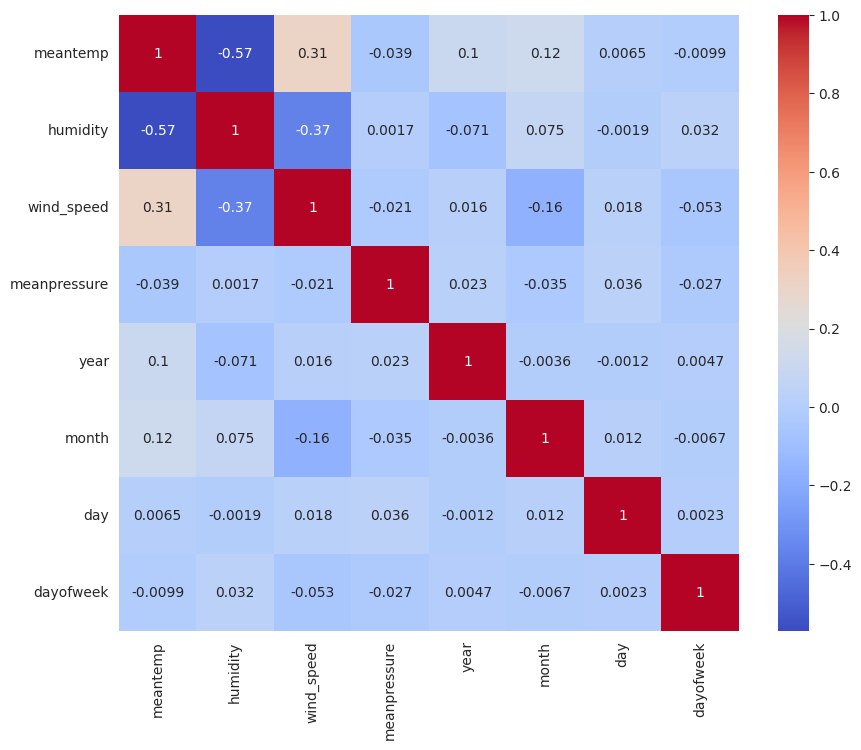

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(data.select_dtypes(include = 'number').corr(), annot = True, cmap = 'coolwarm')
plt.show()

** Calculando a correlação entre as variáveis numéricas do DataFrame 'data' e classificando de forma decrescente com base em "meantemp"**

In [ ]:
data.select_dtypes(include = 'number').corr().sort_values(by = 'meantemp', ascending = False)

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek
meantemp,1.000,-0.572,0.306,-0.039,0.104,0.123,0.006,-0.010
wind_speed,0.306,-0.374,1.000,-0.021,0.016,-0.161,0.018,-0.053
month,0.123,0.075,-0.161,-0.035,-0.004,1.000,0.012,-0.007
year,0.104,-0.071,0.016,0.023,1.000,-0.004,-0.001,0.005
day,0.006,-0.002,0.018,0.036,-0.001,0.012,1.000,0.002
dayofweek,-0.010,0.032,-0.053,-0.027,0.005,-0.007,0.002,1.000
meanpressure,-0.039,0.002,-0.021,1.000,0.023,-0.035,0.036,-0.027
humidity,-0.572,1.000,-0.374,0.002,-0.071,0.075,-0.002,0.032


**gerando quatro histogramas, um para cada variável meteorológica: temperatura média, umidade, velocidade do vento e pressão média em uma grade 2x2.**

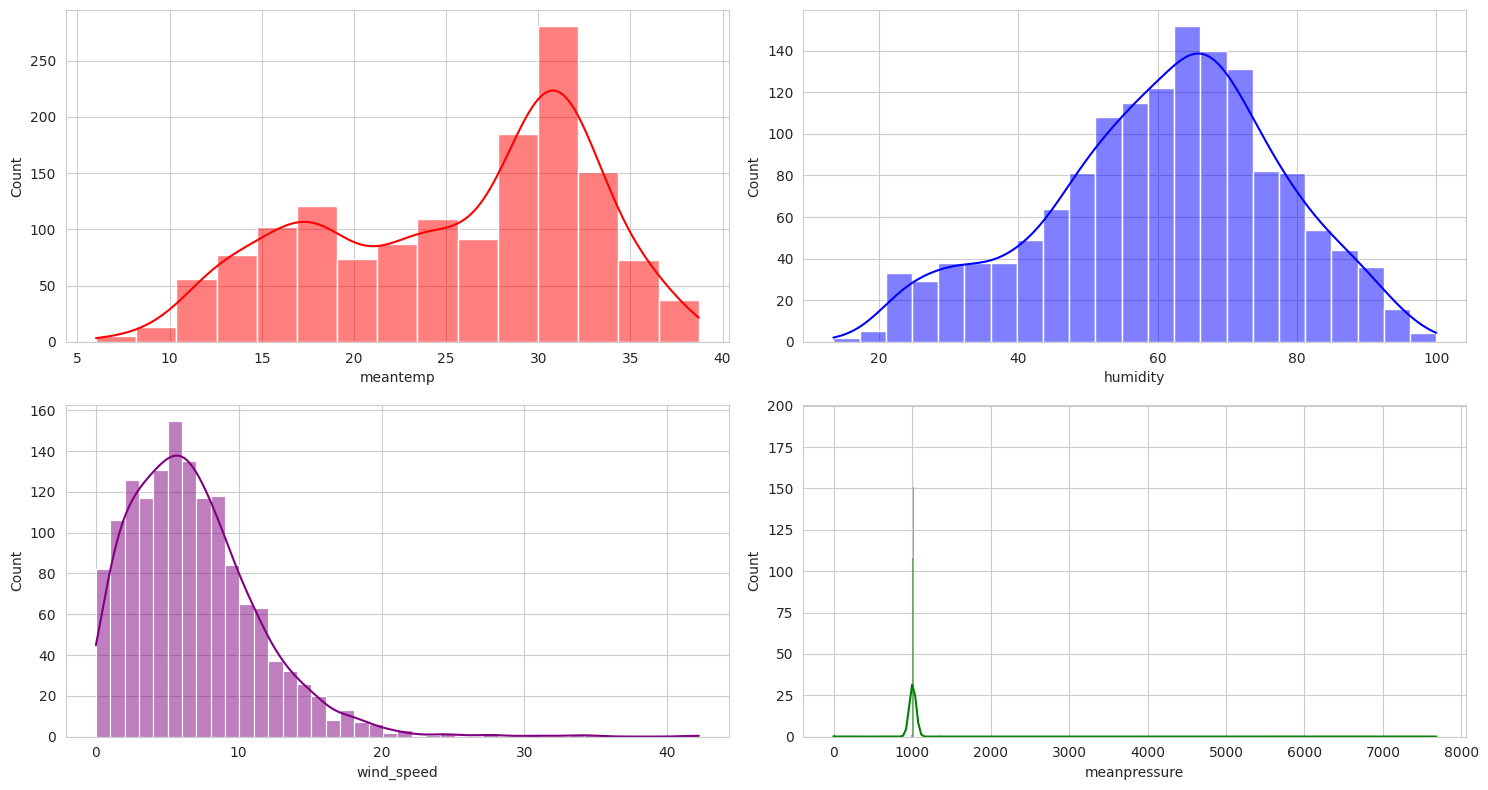

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (15,8))

sns.histplot(data = data, x = 'meantemp', ax = axes[0,0], color = 'red', kde = True)
sns.histplot(data = data, x = 'humidity', ax = axes[0,1], color = 'blue', kde = True)
sns.histplot(data= data, x ='wind_speed', ax = axes[1,0], color = 'purple', kde = True)
sns.histplot(data = data, x = 'meanpressure', ax = axes[1,1], color = 'green', kde = True)
plt.tight_layout()
plt.show()


**Redefinindo o DataFrame data para incluir apenas as colunas de temperatura média, umidade e velocidade do vento e descartando as outras colunas. **

In [ ]:
data = data[['meantemp', 'humidity', 'wind_speed']]
data

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000,84.500,0.000
2013-01-02,7.400,92.000,2.980
2013-01-03,7.167,87.000,4.633
2013-01-04,8.667,71.333,1.233
2013-01-05,6.000,86.833,3.700
...,...,...,...
2016-12-28,17.217,68.043,3.548
2016-12-29,15.238,87.857,6.000
2016-12-30,14.095,89.667,6.267


**Verificando as informações de cada coluna.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meantemp    1462 non-null   float64
 1   humidity    1462 non-null   float64
 2   wind_speed  1462 non-null   float64
dtypes: float64(3)
memory usage: 45.7 KB


**Preparando nosso modelo, treinando e obtendo as previsões.**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfjvyr55g/ovx8snd9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfjvyr55g/06_hj0jg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58094', 'data', 'file=/tmp/tmpfjvyr55g/ovx8snd9.json', 'init=/tmp/tmpfjvyr55g/06_hj0jg.json', 'output', 'file=/tmp/tmpfjvyr55g/prophet_model8kkbetla/prophet_model-20240922220712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:07:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:07:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE: 2.7516987879060473
R2: 0.9140461775140597


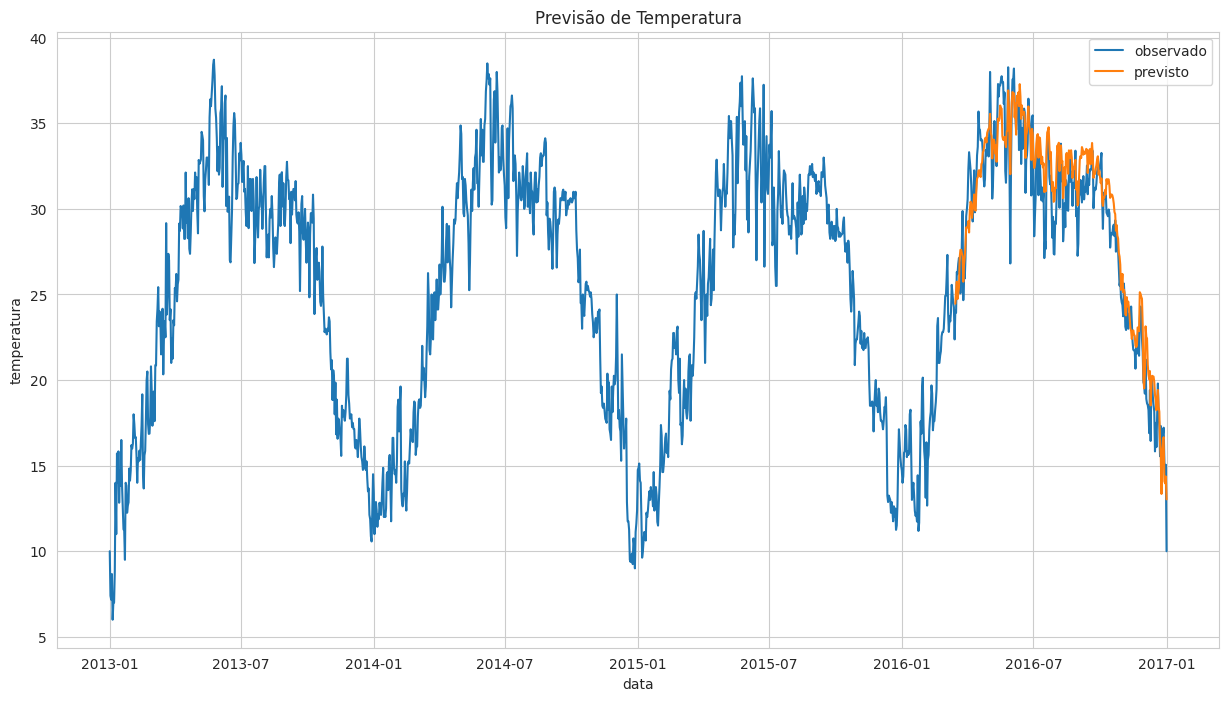

In [ ]:
# Importa a biblioteca Prophet
from prophet import Prophet

# Prepara os dados para o Prophet
# Reinicia o índice do DataFrame 'data' e renomeia as colunas 'date' para 'ds' e 'meantemp' para 'y', conforme exigido pelo Prophet.
dataprophet = data.reset_index().rename(columns = {'date' : 'ds', 'meantemp': 'y'})

# Adiciona as colunas 'humidity' e 'wind_speed' ao DataFrame 'dataprophet',
# copiando os valores do DataFrame original 'data'.
dataprophet['humidity'] = data['humidity'].values
dataprophet['wind_speed'] = data['wind_speed'].values

# Divide os dados em conjuntos de treinamento e teste:
# - Calcula o tamanho do conjunto de treinamento (80% dos dados).
train_size = int(len(dataprophet) * 0.8)
# - Divide o DataFrame 'dataprophet' em conjuntos de treinamento ('train') e teste ('test') usando indexação.
train, test = dataprophet.iloc[:train_size], dataprophet.iloc[train_size:]

# Cria uma instância do modelo Prophet.
modelo = Prophet()
# Adiciona 'humidity' como um regressor externo ao modelo.
modelo.add_regressor('humidity')
# Adiciona 'wind_speed' como um regressor externo ao modelo.
modelo.add_regressor('wind_speed')
# Treina o modelo Prophet usando os dados de treinamento.
modelo.fit(train)

# Cria um DataFrame com datas futuras para previsão, incluindo o período de teste.
datafuturo = modelo.make_future_dataframe(periods = len(test), freq = 'D')
# Adiciona os regressores 'humidity' e 'wind_speed' ao DataFrame de datas futuras.
datafuturo['humidity'] = data['humidity'].values
datafuturo['wind_speed'] = data['wind_speed'].values

# Faz a previsão usando o modelo treinado e o DataFrame de datas futuras.
previsao = modelo.predict(datafuturo)

# Seleciona as colunas relevantes da previsão e filtra para o período de teste.
previsto = previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].set_index('ds').loc[test['ds']]

# Calcula o erro quadrático médio entre os valores reais e as previsões.
mse = mean_squared_error(test['y'], previsto['yhat'])
# Calcula o coeficiente de determinação entre os valores reais e as previsões.
r2 = r2_score(test['y'], previsto['yhat'])

# Imprime o MSE e o R2.
print(f'MSE: {mse}')
print(f'R2: {r2}')

# Cria um gráfico para visualizar as previsões.
plt.figure(figsize = (15,8))
plt.plot(dataprophet['ds'], dataprophet['y'], label = 'observado')
plt.plot(previsto.index, previsto['yhat'], label = 'previsto')
plt.xlabel('data')
plt.ylabel('temperatura')
plt.title('Previsão de Temperatura')
plt.legend()
plt.show()

**Visualizando as previsões de temperatura no conjunto de teste**

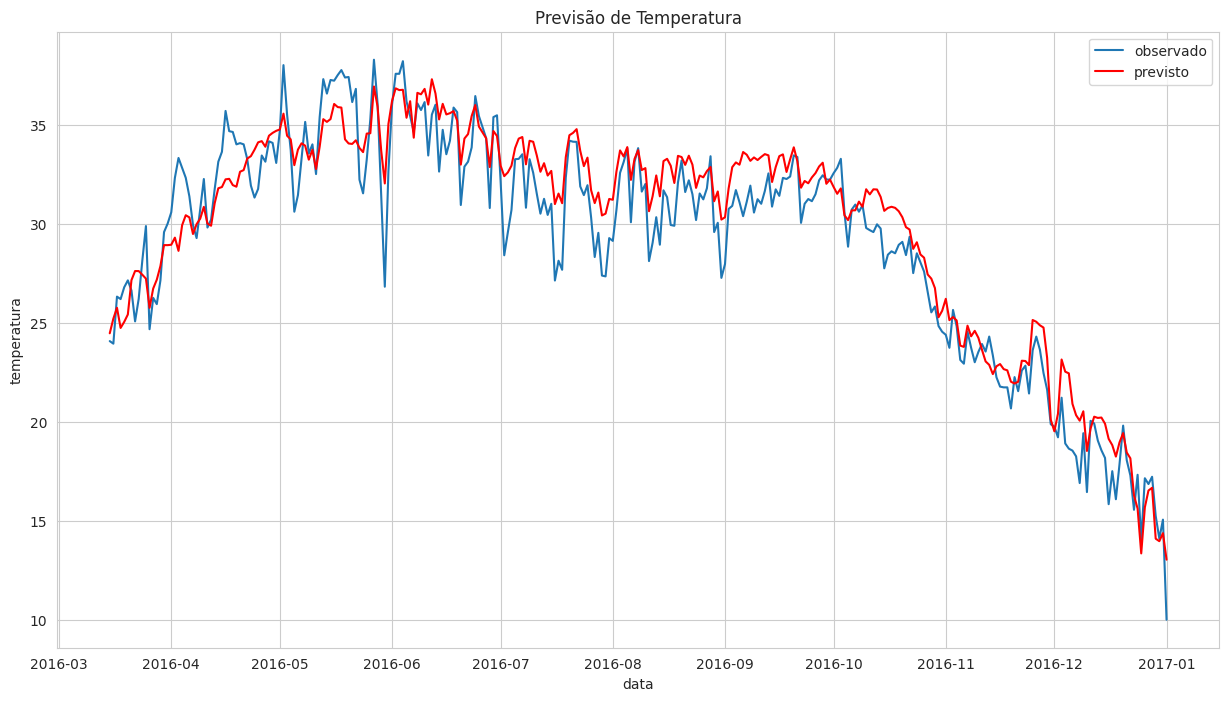

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(test['ds'], test['y'], label = 'observado')
plt.plot(previsto.index, previsto['yhat'], label = 'previsto', color = 'red')
plt.xlabel('data')
plt.ylabel('temperatura')
plt.title('Previsão de Temperatura')
plt.legend()
plt.show()